In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data
    
    Args:
        data: shape = (N, d). original data. 
        k: integer number. predefined number of clusters for the k-means algorithm. 
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    return data[np.random.choice(range(data.shape[0]), k, replace=False)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [39]:
from sklearn.metrics.pairwise import euclidean_distances

def build_distance_matrix(data, mu):
    """builds a distance matrix.
    
    Args:
        data: numpy array of shape = (N, d). original data. 
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,  
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    return euclidean_distances(data, mu, squared=True)

#### Update k-means parameters

In [40]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to, 
            then update the parameter cluster centers.
    
    Args:
        data:   numpy array of shape = (N, d). original data. 
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    mu = np.copy(mu_old)
    k = mu.shape[0]
    distances = build_distance_matrix(data, mu)
    assignments = np.argmin(distances, axis=1)
    losses = distances[np.arange(data.shape[0]), assignments]
    for j in range(k):
        mu[j] = np.mean(data[assignments == j], axis=0)
    return losses, assignments, mu

#### Play with k-means

The current iteration of k-means is: 0,                    the average loss is 56.403336606617664.


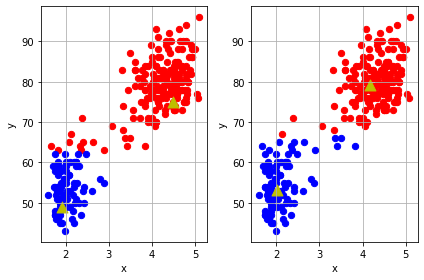

The current iteration of k-means is: 1,                    the average loss is 34.168186009176566.


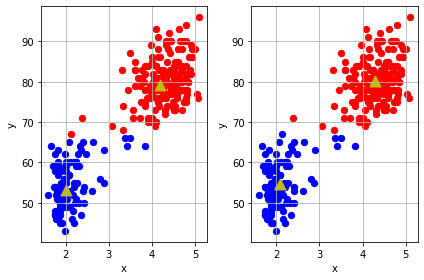

The current iteration of k-means is: 2,                    the average loss is 32.73654790863267.


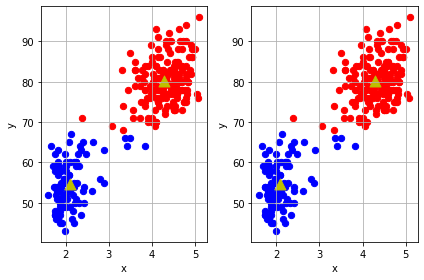

The current iteration of k-means is: 3,                    the average loss is 32.72709088583548.


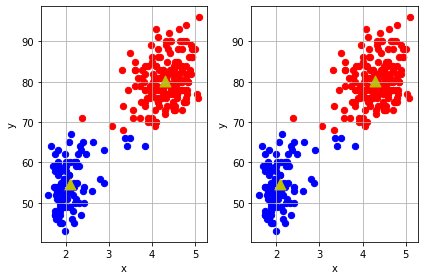

The current iteration of k-means is: 4,                    the average loss is 32.72709088583548.


In [42]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold, verbose = True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print("The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(i=iteration, l=average_loss))
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu
    return average_loss, mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
average_loss, _ = kmeans(data, k, max_iters, threshold)

### Plotting the loss as a function of number of clusters

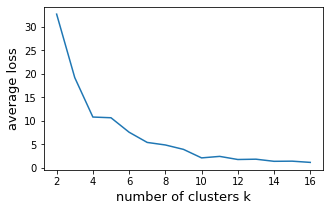

In [45]:
# don't worry about empty slice warnings
import warnings
warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss, _ = kmeans(data, k, max_iters, threshold, verbose = False)
    losses += [average_loss]
plt.figure(figsize = (5, 3))
plt.xlabel('number of clusters k', fontsize = 13)
plt.ylabel('average loss', fontsize = 13)
plt.plot(ks, losses)
plt.show()

## Using k-means for image compresson

#### load image

In [46]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [47]:
def preprocess_image(original_image):
    """preprocess the image. 
    vectorize the three matrices (each matrix corresponds to a RGB color channel). **don't normalize!** 
    
    Args: 
        original_image: numpy array of shape (480, 480, 3) 
    Returns:
        processed_image: numpy array of shape (480*480, 3)
    """
    processed_image = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], 3))
    return processed_image

processed_image = preprocess_image(original_image)

The current iteration of k-means is: 0,                    the average loss is 0.06184596195816994.


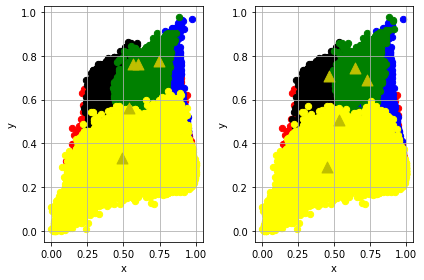

The current iteration of k-means is: 1,                    the average loss is 0.05235517397522926.


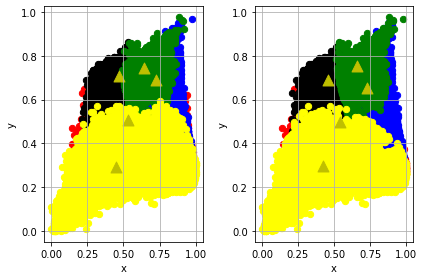

The current iteration of k-means is: 2,                    the average loss is 0.04995271563529968.


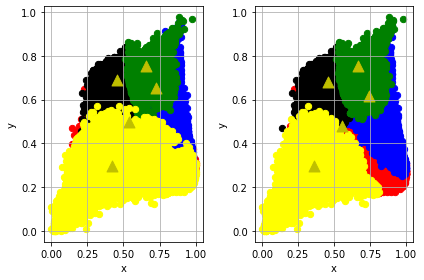

The current iteration of k-means is: 3,                    the average loss is 0.04494650661945343.


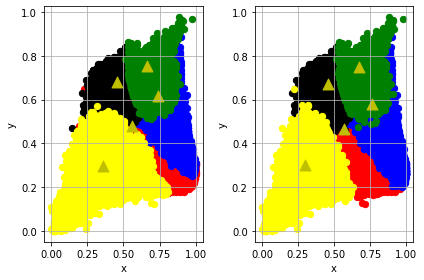

The current iteration of k-means is: 4,                    the average loss is 0.041056808084249496.


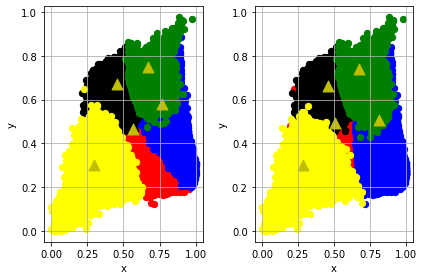

The current iteration of k-means is: 5,                    the average loss is 0.0328652560710907.


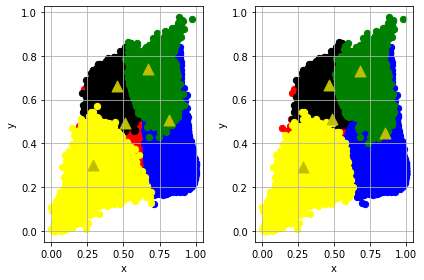

The current iteration of k-means is: 6,                    the average loss is 0.028984349220991135.


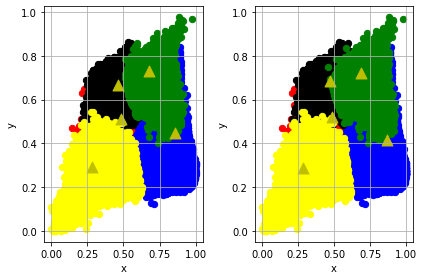

The current iteration of k-means is: 7,                    the average loss is 0.027707163244485855.


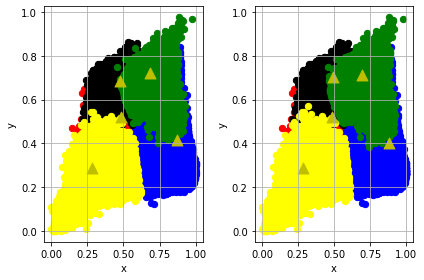

The current iteration of k-means is: 8,                    the average loss is 0.02698572538793087.


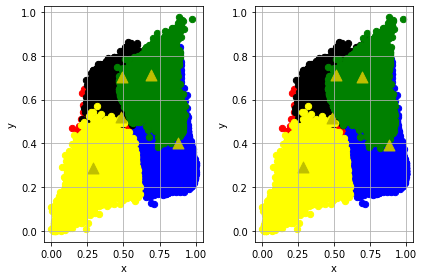

The current iteration of k-means is: 9,                    the average loss is 0.026494396850466728.


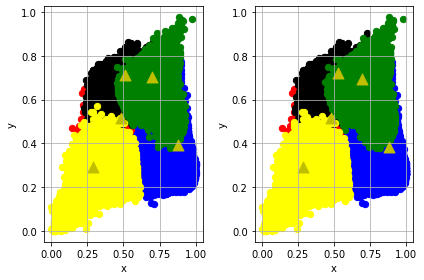

The current iteration of k-means is: 10,                    the average loss is 0.02607623115181923.


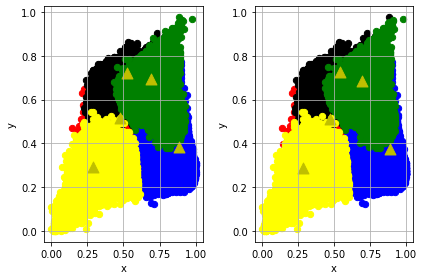

The current iteration of k-means is: 11,                    the average loss is 0.025757158175110817.


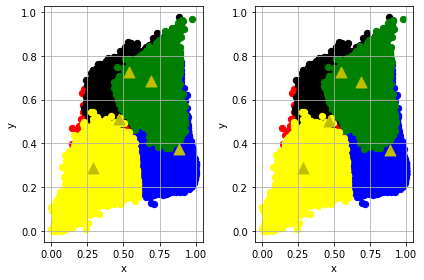

The current iteration of k-means is: 12,                    the average loss is 0.025530748069286346.


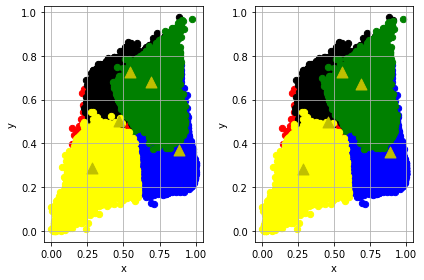

The current iteration of k-means is: 13,                    the average loss is 0.02537970058619976.


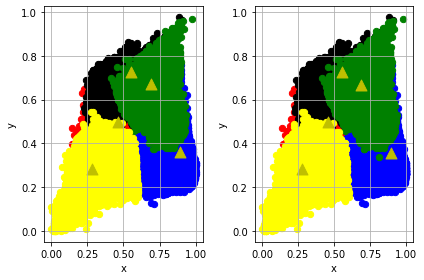

The current iteration of k-means is: 14,                    the average loss is 0.025280829519033432.


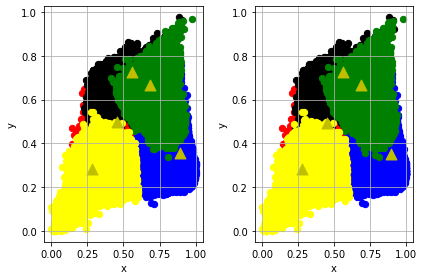

The current iteration of k-means is: 15,                    the average loss is 0.025214985013008118.


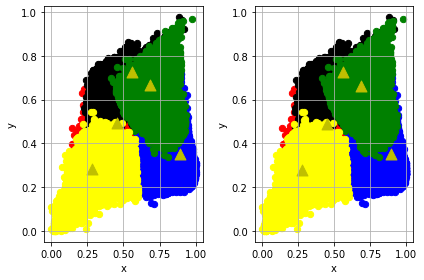

The current iteration of k-means is: 16,                    the average loss is 0.02517206408083439.


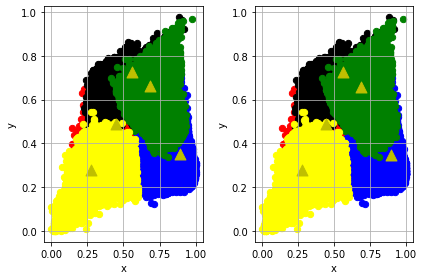

The current iteration of k-means is: 17,                    the average loss is 0.025144021958112717.


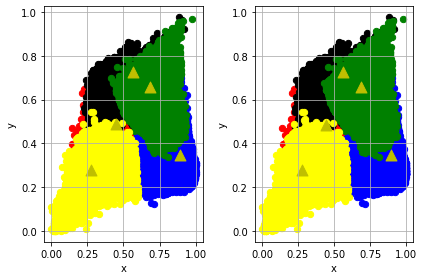

The current iteration of k-means is: 18,                    the average loss is 0.025126302614808083.


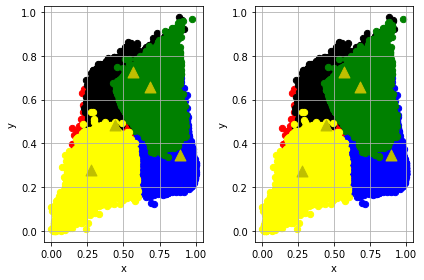

The current iteration of k-means is: 19,                    the average loss is 0.02511567808687687.


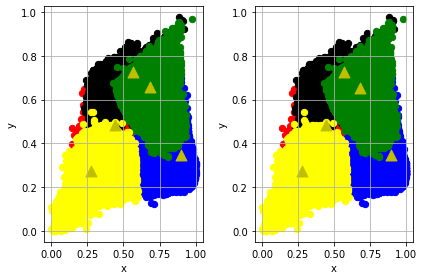

The current iteration of k-means is: 20,                    the average loss is 0.0251089408993721.


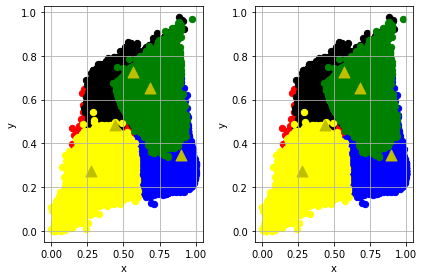

The current iteration of k-means is: 21,                    the average loss is 0.02510463073849678.


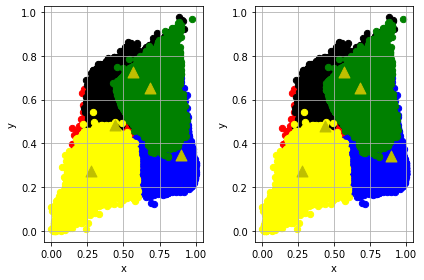

The current iteration of k-means is: 22,                    the average loss is 0.025102125480771065.


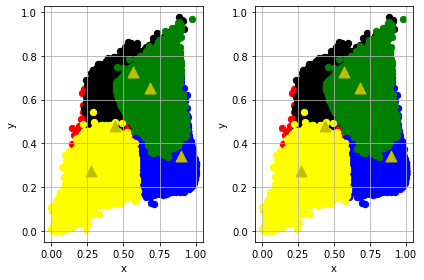

The current iteration of k-means is: 23,                    the average loss is 0.025100480765104294.


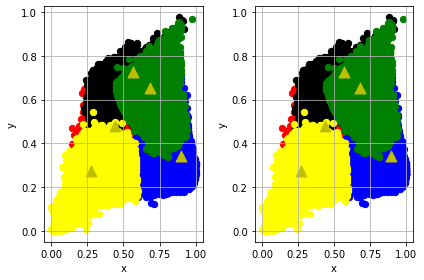

The current iteration of k-means is: 24,                    the average loss is 0.025099441409111023.


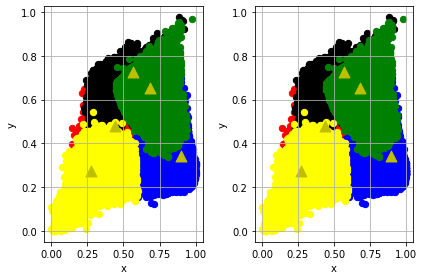

The current iteration of k-means is: 25,                    the average loss is 0.025098776444792747.


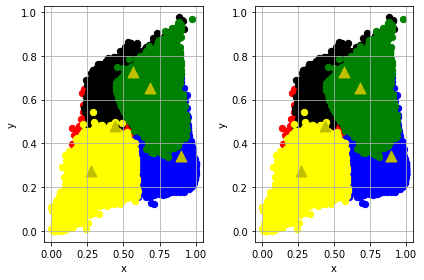

The current iteration of k-means is: 26,                    the average loss is 0.025098398327827454.


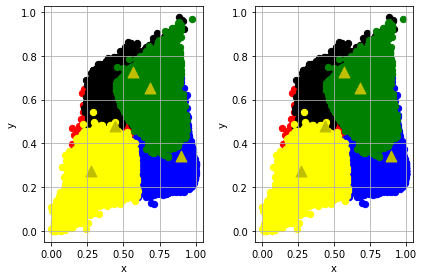

The current iteration of k-means is: 27,                    the average loss is 0.025098145008087158.


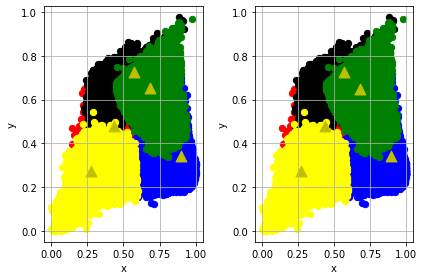

The current iteration of k-means is: 28,                    the average loss is 0.02509797364473343.


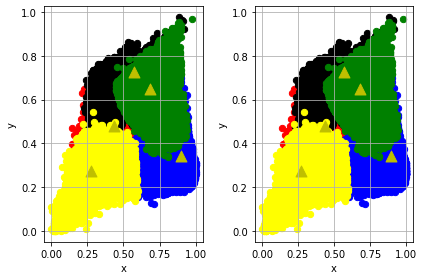

The current iteration of k-means is: 29,                    the average loss is 0.025097833946347237.


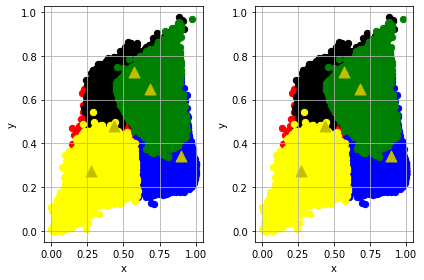

The current iteration of k-means is: 30,                    the average loss is 0.025097744539380074.


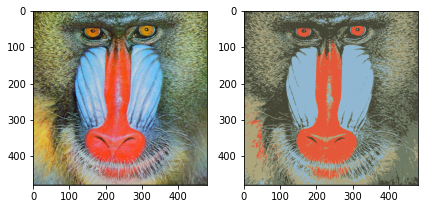

In [48]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args: 
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """
    # run k-means algorithm
    _, mu = kmeans(processed_image, k, max_iters, threshold)

    # get the cluster assignments
    distances = build_distance_matrix(processed_image, mu)
    assignments = np.argmin(distances, axis=1)
    
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)
    

# define parameters
k = 5
max_iter = 100
threshold = 1e-7

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)